<a href="https://colab.research.google.com/github/srilav/machinelearning/blob/main/Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

The market researcher can segment customers into the B2C model using various customer's demographic characteristics such as occupation, gender, age, location, and marital status. Psychographic characteristics such as social class, lifestyle and personality characteristics and behavioral characteristics such as spending, consumption habits, product/service usage, and previously purchased products. In the B2B model using various company's characteristics such as the size of the company, type of industry, and location

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique (K-Means)

**What is RFM?**

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business.

**RECENCY:** How recently did the customer visit our website or how recently did a customer purchase? Number of days since last purchase (least recency)
**Frequency:** How often do they visit or how often do they purchase?It means the total number of purchases. ( high frequency)
**Monetary:** How much revenue we get from their visit or how much do they spend when they purchase? It means the total money customer spent (high monetary value) 

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies

Steps of RFM(Recency, Frequency, Monetary):
*  Calculate the Recency, Frequency, Monetary values for each customer.
*  Add segment bin values to RFM table using quartile
*  Sort the customer RFM score in ascending order

### Import Required packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

Cannot rely on df.info() method to get the real data type of the values of a feature, as some missing values that are represented as strings in a continuous feature can coerce it to read them as object dtypes

**Tip:** in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns.Note that the DataFrame with category dtype is much faster

## Load the data

In [ ]:
#Load data
def load_data(Filepath):
  data = pd.read_csv(
    Filepath,      # relative python path to subdirectory
    sep=',',           # Comma-separated value file.
    encoding='unicode_escape',        # encoding
    header=0,                  # specify a row as header
    usecols=[0,1,2,3,4,5,6,7],   # Only load the  columns specified.
    dtype={"InvoiceNo": str,"StockCode":str,"CustomerID":str,"UnitPrice":float,"Quantity":int,"Description":str,"Country":"category"},             # Parse the agecolumn as an integer     
    parse_dates=["InvoiceDate"],     # Intepret the date column as a date
    skiprows=None,         # Skip the first few rows of the file
    na_values=['.', 'na','NA','NAN','NaN','Nan']       # Take any '.' or 'na' values as NA
    )
  return data

Filepath='/content/Online_Retail_Train.csv'
train_df=load_data(Filepath)
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [ ]:
#Trimming customer ID column
train_df = train_df.sort_values(ascending=True,by=["InvoiceDate","CustomerID", "InvoiceNo"]).reset_index()
train_df['CustomerID'] = train_df['CustomerID'].replace('\.0', '', regex=True)

## Data Pre-processing (2 points)

In [ ]:
#data exploration
def explore_data(df):
    print(f"First 5 rows : \n {df.head()} \n")
    print(f"Shape : \n {df.shape} \n")
    print(f"Columns : \n {df.columns} \n")
    print(f"Data types : \n {df.dtypes}\n")
    print(f"Summary of data : \n {df.describe()} \n")
    print(f"data info :\n{df.info()}\n")
    print(f"Null objects in each column :\n{df.isnull().sum()}\n")
    print(f"Duplicate rows in data :\n{np.any(df.duplicated())}\n")

explore_data(train_df)

First 5 rows : 
     index InvoiceNo StockCode  ... UnitPrice  CustomerID         Country
0    5391    536365     21730  ...      4.25       17850  United Kingdom
1  211900    536365    85123A  ...      2.55       17850  United Kingdom
2  271253    536365    84029E  ...      3.39       17850  United Kingdom
3  322923    536365     71053  ...      3.39       17850  United Kingdom
4  385612    536365    84029G  ...      3.39       17850  United Kingdom

[5 rows x 9 columns] 

Shape : 
 (514813, 9) 

Columns : 
 Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object') 

Data types : 
 index                   int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country              category
dtype: object

Summary of data : 
            

In [ ]:
#NULL percentage
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(train_df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(train_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(train_df.isnull().sum()/train_df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,int64,object,object,object,int64,datetime64[ns],float64,object,category
null values (nb),0,0,0,1385,0,0,0,128263,0
null values (%),0,0,0,0.26903,0,0,0,24.9145,0


Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [ ]:
for x in train_df.columns:
  print(f"Unique {x} : \n {train_df[x].unique().shape}")

Unique index : 
 (514813,)
Unique InvoiceNo : 
 (25610,)
Unique StockCode : 
 (4062,)
Unique Description : 
 (4211,)
Unique Quantity : 
 (713,)
Unique InvoiceDate : 
 (23059,)
Unique UnitPrice : 
 (1582,)
Unique CustomerID : 
 (4368,)
Unique Country : 
 (38,)


Only 4367 Unique customers who brought 3679 different  Products.The total number of transactions carried out is of the order of  ∼ 22.000 

In [ ]:
train_df['InvoiceDate'].min(),train_df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [ ]:
train_df['DayOfWeek']=train_df['InvoiceDate'].dt.weekday
train_df.tail()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
514808,350247,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,4
514809,375846,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,4
514810,399451,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,4
514811,420471,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680,France,4
514812,491871,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,4


In [ ]:
list_special_codes =  train_df[ train_df['InvoiceNo'].str.contains('^[a-zA-Z]+', regex=True)]['InvoiceNo'].unique()
list_special_codes

array(['C536383', 'C536391', 'C536506', ..., 'C581499', 'C581568',
       'C581569'], dtype=object)

In [ ]:
n1 = train_df['InvoiceNo'].apply(lambda x:int('C' in x)).sum()
n2 = train_df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 8797/514813 (1.71%) 


The number of cancellations is not quite large ( ∼ 1.7% of the total number of transactions).

In [ ]:
n1 = train_df['InvoiceNo'].apply(lambda x:int('A' in x)).sum()
n2 = train_df.shape[0]
print('Number of orders adjusted: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders adjusted: 3/514813 (0.00%) 


In [ ]:
n1 =train_df[(train_df['Quantity']<0)].shape[0]
n2 = train_df.shape[0]
print('Number of orders with negative quantity : {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders with negative quantity : 10084/514813 (1.96%) 


In [ ]:
train_df = train_df[(train_df['Quantity']>0)]
n1 = train_df['InvoiceNo'].apply(lambda x:int('C' in x)).sum()
n2 = train_df.shape[0]
print('Number of orders canceled after removing negative quantity : {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))
n1 = train_df['InvoiceNo'].apply(lambda x:int('A' in x)).sum()
n2 = train_df.shape[0]
print('Number of orders adjusted after removing negative quantity: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled after removing negative quantity : 0/504729 (0.00%) 
Number of orders adjusted after removing negative quantity: 3/504729 (0.00%) 


In [ ]:
list_special_codes =  train_df[train_df['InvoiceNo'].str.contains('^[a-zA-Z]+', regex=True)]['InvoiceNo'].unique()
list_special_codes

array(['A563185', 'A563186', 'A563187'], dtype=object)

In [ ]:
temp = train_df[train_df['InvoiceNo'].isin(list_special_codes)]
temp.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
285006,279008,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,4
285007,405078,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,4
285008,51050,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,4


In [ ]:
train_df[train_df["StockCode"].str.contains('^[a-zA-Z]+', regex=True)]["StockCode"].unique()

array(['POST', 'C2', 'DOT', 'M', 'BANK CHARGES', 'DCGS0076', 'DCGS0003',
       'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30',
       'gift_0001_20', 'DCGS0069', 'DCGSSGIRL', 'DCGSSBOY',
       'gift_0001_10', 'AMAZONFEE', 'S', 'PADS', 'DCGS0004', 'B'],
      dtype=object)

In [ ]:
train_df[train_df["StockCode"]=='gift_0001_50']

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
39950,309309,539958,gift_0001_50,Dotcomgiftshop Gift Voucher Â£50.00,1,2010-12-23 13:26:00,42.55,NaN,United Kingdom,3
169574,341773,552232,gift_0001_50,Dotcomgiftshop Gift Voucher Â£50.00,1,2011-05-06 15:54:00,41.67,NaN,United Kingdom,4
233203,413408,558614,gift_0001_50,Dotcomgiftshop Gift Voucher Â£50.00,1,2011-06-30 15:56:00,41.67,NaN,United Kingdom,3


Dropping negative quantity only remove cancelled orders not adjusted one's.Which can be removed by handling missing customer ID

In [ ]:
#Handling missing customer ID
print(f"Percentage of the entries that are not assigned to a particular customer :\n{train_df['CustomerID'].isnull().sum()/train_df['CustomerID'].shape[0]*100}\n")

Percentage of the entries that are not assigned to a particular customer :
25.085342827537154



In [ ]:
#Remove those with no customer information
print(f"Total rows dataframe before removing missing customers :\n{train_df.shape}\n")
train_df= train_df[pd.notnull(train_df['CustomerID'])] #Remove missing customer ID rows
print(f"Total rows dataframe after removing missing customers :\n{train_df.shape}\n")

Total rows dataframe before removing missing customers :
(504729, 10)

Total rows dataframe after removing missing customers :
(378116, 10)



In [ ]:
#temp_desc_df=train_df.groupby(['Description','StockCode']).count().reset_index()
#temp_desc_df.StockCode.value_counts()[temp_desc_df.StockCode.value_counts()>1].reset_index().head()

There is a mismatch between StockCode and Description i.e we have multiple descriptions for the same Stockcodes.

In [ ]:
#Handling missing Description
print(f"Total rows dataframe before removing missing customers :\n{train_df.shape}\n")
train_df= train_df[pd.notnull(train_df['Description'])] #Remove missing customer ID rows
print(f"Total rows dataframe after removing missing customers :\n{train_df.shape}\n") # Already removed by missing customers

Total rows dataframe before removing missing customers :
(378116, 10)

Total rows dataframe after removing missing customers :
(378116, 10)



In [ ]:
irrelevant_productcode=  train_df[train_df["StockCode"].str.contains('^[a-zA-Z]+', regex=True)]["StockCode"].unique()
irrelevant_productcode

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [ ]:
train_df[train_df["StockCode"].isin(irrelevant_productcode)]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
30,88355,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,2
365,131378,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,2
1063,167919,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,2
1329,85158,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE,2
2087,59768,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,2
...,...,...,...,...,...,...,...,...,...,...
511505,317708,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,3
514128,253185,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423,Belgium,4
514152,424538,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518,Germany,4
514637,92930,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany,4


In [ ]:
#DROP irrelevant codes data
for code in irrelevant_productcode:
  index = train_df[ (train_df['StockCode'] == code)].index
  train_df.drop(index, inplace = True)

In [ ]:
irrelevant_productcode=  train_df[train_df["StockCode"].str.contains('^[a-zA-Z]+', regex=True)]["StockCode"].unique()
irrelevant_productcode

array([], dtype=object)

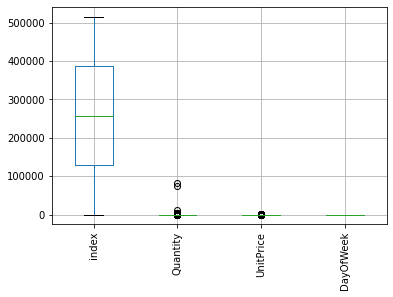

In [ ]:
# Checking for outliers
train_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Handing outliers
from scipy import stats
outlier_colms = ["Quantity"]
df1 = train_df.copy()

def handle_outliers(df, colm):
    ''' Any absolute value of z-score above 3 is considered as an Outlier '''
    df[colm+'_z_score']=stats.zscore(df[colm])
    df=df.loc[df[colm+'_z_score'].abs()<=3]
    df.drop(colm,axis=1,inplace=True)

    return df
    
for colm in outlier_colms:
    train_df = handle_outliers(df1, colm)

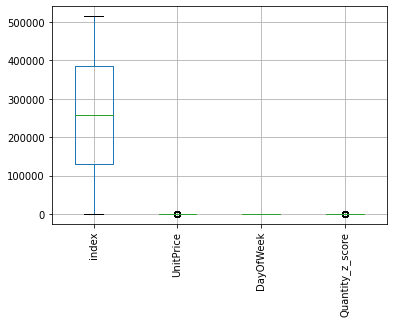

In [ ]:
# Checking for outliers
train_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_df[train_df.duplicated(subset=["InvoiceNo","StockCode","Description","Quantity_z_score","InvoiceDate","CustomerID","Country"])^train_df.duplicated(subset=["InvoiceNo","StockCode","Quantity_z_score","UnitPrice","CustomerID"])]

,index,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Quantity_z_score
189126,384488,554084,23298,SPOTTY BUNTING,2011-05-22 11:52:00,4.95,12909,United Kingdom,6,-0.054377
333286,244808,567656,22469,HEART OF WICKER SMALL,2011-09-21 14:40:00,1.63,14096,United Kingdom,2,-0.059778
370251,149561,570488,23217,LAUREL HEART ANTIQUE SILVER,2011-10-10 17:12:00,2.46,14096,United Kingdom,0,-0.065179
429791,290654,575335,23203,JUMBO BAG VINTAGE DOILY,2011-11-09 13:56:00,1.79,12931,United Kingdom,2,1.549758
456654,404439,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2011-11-18 13:23:00,0.00,12444,Norway,4,-0.059778


In [ ]:
train_df.duplicated(subset=["CustomerID","Country"]).value_counts()#description not included different duplicates

True     371956
False      4327
dtype: int64

In [ ]:
train_df.duplicated(subset=["CustomerID","Country","InvoiceDate","InvoiceNo","Description","Quantity_z_score"]).value_counts()#unitprice not included different duplicates

False    371533
True       4750
dtype: int64

In [ ]:
train_df.duplicated(subset=["CustomerID","Country","InvoiceDate","InvoiceNo","Description","Quantity_z_score","UnitPrice"]).value_counts()#description not included different duplicates

False    371575
True       4708
dtype: int64

In [ ]:
def duplicate_drop(df):
  print(f"Duplicate objects in dataframe before :\n{df.duplicated().value_counts()}\n")
  #df.dropna(thresh=len(df)*0.9, axis=1)  #drop columns in which more than 10% of values missing
  df=df.drop_duplicates(subset=["CustomerID","Country","InvoiceDate","InvoiceNo","Description","Quantity_z_score"])
  print(f"Duplicate objects in dataframe after :\n{df.duplicated().value_counts()}\n")
  return df

train_df=duplicate_drop(train_df)

Duplicate objects in dataframe before :
False    376283
dtype: int64

Duplicate objects in dataframe after :
False    371533
dtype: int64



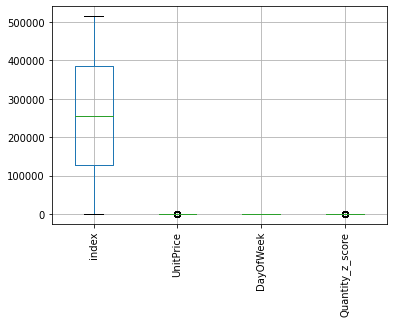

In [ ]:
# Recheck for outliers
train_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_df.head()

,index,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Quantity_z_score
0,5391,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,2010-12-01 08:26:00,4.25,17850,United Kingdom,2,-0.038173
1,211900,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,United Kingdom,2,-0.038173
2,271253,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850,United Kingdom,2,-0.038173
3,322923,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850,United Kingdom,2,-0.038173
4,385612,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850,United Kingdom,2,-0.038173


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [ ]:
#FREE item
n1 =train_df[(train_df['UnitPrice']==0)].shape[0]
n2 = train_df.shape[0]
print('Number of FREE items : {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of FREE items : 29/371533 (0.01%) 


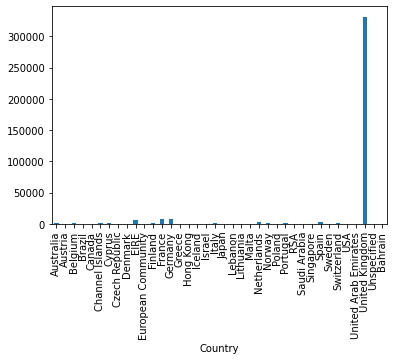

In [ ]:
#Number of transactions per country and visualize using an appropriate plot
train_df.groupby(by="Country")["InvoiceNo"].count().plot(kind='bar')

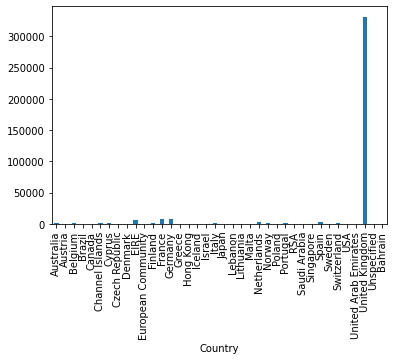

In [ ]:
#number of Customers per country and visualize using an appropriate plot
train_df.groupby(by="Country")["CustomerID"].count().plot(kind='bar')

**Note:**  Most of the customers and transactions are from UK

In [ ]:
#pie chart for customer frequency 


# Market Basket Analysis

In market basket analysis (also called association analysis or frequent itemset mining), you analyze purchases that commonly happen together i.e Market Basket Analysis takes data at transaction level, which lists all items bought by a customer in a single purchase

In [ ]:
temp =train_df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate','Quantity_z_score'].count()
nb_products_per_basket = temp.rename(columns = {'Quantity_z_score':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,InvoiceDate,Number of products
0,12347,537626,27,27
1,12347,542237,26,26
2,12347,549222,23,23
3,12347,556201,17,17
4,12347,562032,22,22
5,12347,573511,46,46
6,12347,581180,10,10
7,12348,539318,16,16
8,12348,541998,4,4
9,12348,548955,4,4


In [ ]:
# YOUR CODE HERE

## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [ ]:
train_df.head()

,index,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Quantity_z_score
0,5391,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,2010-12-01 08:26:00,4.25,17850,United Kingdom,2,-0.038173
1,211900,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,United Kingdom,2,-0.038173
2,271253,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850,United Kingdom,2,-0.038173
3,322923,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850,United Kingdom,2,-0.038173
4,385612,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850,United Kingdom,2,-0.038173


In [ ]:
# Train data feature engineering 
import datetime as dt

def feature_engineering(df):
  PRESENT=dt.datetime(2011,12,10)
  df['TotalAmount']=df.Quantity_z_score*df.UnitPrice
  rfm= df.groupby(['CustomerID']).agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalAmount': lambda price: price.sum()
                                        })
  return rfm

In [ ]:
rfm=feature_engineering(train_df)

In [ ]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalAmount,Country
CustomerID,,,,
12347,2,171,-9.663472,171
12348,75,26,6.237080,26
12349,18,67,-11.638152,67
12350,310,16,-0.195581,16
12352,36,77,-14.664136,77


In [ ]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalAmount', 'Country'], dtype='object')

In [ ]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [ ]:
C=train_df.groupby('CustomerID')["Country"].count()
C #No of customers

CustomerID
12347    171
12348     26
12349     67
12350     16
12352     77
        ... 
18280     10
18281      7
18282     11
18283    677
18287     68
Name: Country, Length: 4319, dtype: int64

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12347,2,171,-9.663472
12348,75,26,6.237080
12349,18,67,-11.638152
12350,310,16,-0.195581
12352,36,77,-14.664136


In [ ]:
# Test data feature engineering 


### Scale the data
 
Apply `StandardScaler` on the features.

In [ ]:
# YOUR CODE HERE for scaling
scaler = StandardScaler()
scaler.fit(rfm)
data_norm = scaler.transform(rfm)

## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [ ]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3,init='k-means++', n_init = 1, random_state=1,max_iter=300)
y_predict = kmeans.fit_predict(data_norm)

In [ ]:
print("Cluster memberships:\n{}".format(kmeans.labels_)) #Set to 3 clusters numbered 0 to 2

Cluster memberships:
[0 0 0 ... 0 0 0]


#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

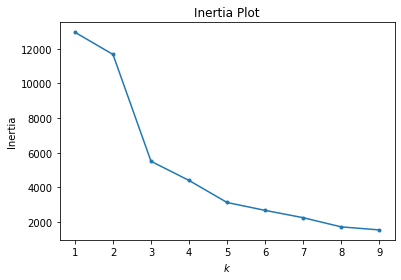

In [ ]:
# YOUR CODE HERE
# Plot inertia by varying number of clusters
clusters = np.arange(1,10)
inertia = {}
for c in clusters:
    kmeans = KMeans(n_clusters = c,init='k-means++', n_init = 1, random_state=1,max_iter=300)
    # YOUR CODE HERE to fit 'kmeans' on (X, y)
    kmeans.fit(data_norm)
    inertia[c]=kmeans.inertia_
plt.plot(list(inertia.keys()), list(inertia.values()), marker= '.')
#plt.arrow(5, 400, -2, -252)
#plt.text(5, 410, "Elbow", fontdict={'size': 12})
plt.title('Inertia Plot')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
# Perform DBSCAN on data
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(data_norm)
print("Unique clusters in data: ", np.unique(dbscan.labels_))

Unique clusters in data:  [-1  0  1  2  3  4  5  6  7  8  9 10 11]


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

In [ ]:
data_norm

array([[-0.90061593,  0.39737419, -0.04287389],
       [-0.17112975, -0.28068228,  0.32075092],
       [-0.74072855, -0.08895597, -0.08803224],
       ...,
       [-0.85065112, -0.35082605,  0.10863484],
       [-0.89062297,  2.76355745, -1.35174722],
       [-0.50089747, -0.08427972,  0.24035997]])

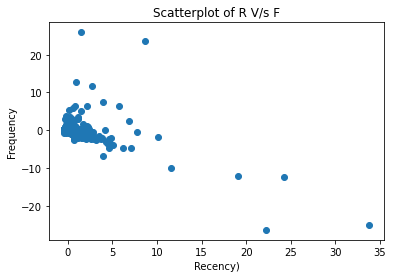

In [ ]:
# YOUR CODE HERE
# Visualize the data using two features
plt.scatter(data_norm[:,1], data_norm[:,2])
plt.title("Scatterplot of R V/s F")
plt.xlabel('Recency)')
plt.ylabel('Frequency')
plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
# YOUR CODE HERE

### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [ ]:
# Test set provided as below
Filepath='/content/Online_Retail_Test.csv'
test_df=load_data(Filepath)
test_df['CustomerID'] = test_df['CustomerID'].replace('\.0', '', regex=True)
test_df.head()

In [ ]:
explore_data(test_df)

In [ ]:
test_df['DayOfWeek']=test_df['InvoiceDate'].dt.weekday
list_special_codes =  test_df[test_df['InvoiceNo'].str.contains('^[a-zA-Z]+', regex=True)]['InvoiceNo'].unique()
len(list_special_codes)

In [ ]:
test_df = test_df[(test_df['Quantity']>0)]
n1 = test_df['InvoiceNo'].apply(lambda x:int('C' in x)).sum()
n2 = test_df.shape[0]
print('Number of orders canceled after removing negative quantity : {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))
n1 = test_df['InvoiceNo'].apply(lambda x:int('A' in x)).sum()
n2 = test_df.shape[0]
print('Number of orders adjusted after removing negative quantity: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

In [ ]:
#Remove those with no customer information
print(f"Total rows dataframe before removing missing customers :\n{test_df.shape}\n")
test_df= test_df[pd.notnull(test_df['CustomerID'])] #Remove missing customer ID rows
print(f"Total rows dataframe after removing missing customers :\n{test_df.shape}\n")